# Chapter 1: Getting Started with Python Polars 

## The Polars DataFrame

In [153]:
import polars as pl

### How to do it...

In [154]:
df = pl.DataFrame({
    'nums': [1,2,3,4,5],
    'letters': ['a','b','c','d','e']
})
df.head()

nums,letters
i64,str
1,"""a"""
2,"""b"""
3,"""c"""
4,"""d"""
5,"""e"""


In [155]:
df = pl.read_csv('../data/titanic_dataset.csv')
df.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [156]:
df.schema

Schema([('PassengerId', Int64),
        ('Survived', Int64),
        ('Pclass', Int64),
        ('Name', String),
        ('Sex', String),
        ('Age', Float64),
        ('SibSp', Int64),
        ('Parch', Int64),
        ('Ticket', String),
        ('Fare', Float64),
        ('Cabin', String),
        ('Embarked', String)])

In [157]:
df.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [158]:
df.dtypes

[Int64,
 Int64,
 Int64,
 String,
 String,
 Float64,
 Int64,
 Int64,
 String,
 Float64,
 String,
 String]

In [159]:
df.shape

(891, 12)

In [160]:
df.height

891

In [161]:
df.width

12

In [162]:
df.flags

{'PassengerId': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'Survived': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'Pclass': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'Name': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'Sex': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'Age': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'SibSp': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'Parch': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'Ticket': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'Fare': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'Cabin': {'SORTED_ASC': False, 'SORTED_DESC': False},
 'Embarked': {'SORTED_ASC': False, 'SORTED_DESC': False}}

### There is more...

In [163]:
import numpy as np

numpy_arr = np.array([[1,1,1], [2,2,2]])
df = pl.from_numpy(numpy_arr, schema={'ones': pl.Float32, 'twos': pl.Int8}, orient='col') 
df.head()

ones,twos
f32,i8
1.0,2
1.0,2
1.0,2


## The Polars Series

### How to do it...

In [164]:
s = pl.Series('col', [1,2,3,4,5])
s.head()

col
i64
1
2
3
4
5


In [165]:
data = {'a': [1,2,3], 'b': [4,5,6]}
s_a = (
    pl.DataFrame(data)
    .to_series()
)
s_a.head()

a
i64
1
2
3


In [166]:
s_b = (
    pl.DataFrame(data)
    .to_series(1)
)
s_b.head()

b
i64
4
5
6


In [167]:
s_b2 = (
    pl.DataFrame(data)
    .get_column('b')
)
s_b2.head()

b
i64
4
5
6


In [168]:
s.shape

(5,)

In [169]:
s.name

'col'

In [170]:
s.dtype

Int64

## The Polars LazyFrame

### How to do it...

In [171]:
data = {'name': ['Sarah',  'Mike', 'Bob', 'Ashley']}
lf = pl.LazyFrame(data) 
type(lf)

polars.lazyframe.frame.LazyFrame

In [172]:
lf.collect().head()

name
str
"""Sarah"""
"""Mike"""
"""Bob"""
"""Ashley"""


In [173]:
lf = pl.scan_csv('../data/titanic_dataset.csv')
lf.head().collect()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [174]:
df = pl.read_csv('../data/titanic_dataset.csv')
df.lazy().head(3).collect()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""


In [175]:
lf.collect_schema()

Schema([('PassengerId', Int64),
        ('Survived', Int64),
        ('Pclass', Int64),
        ('Name', String),
        ('Sex', String),
        ('Age', Float64),
        ('SibSp', Int64),
        ('Parch', Int64),
        ('Ticket', String),
        ('Fare', Float64),
        ('Cabin', String),
        ('Embarked', String)])

In [176]:
lf.collect_schema().len()

12

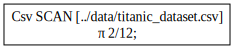

In [177]:
(
    lf
    .select(pl.col('Name', 'Age'))
    .show_graph()
)

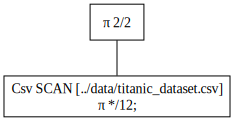

In [178]:
(
    lf
    .select(pl.col('Name', 'Age'))
    .show_graph(optimized=False)
)

In [179]:
(
    lf
    .select(pl.col('Name', 'Age'))
    .explain()
)

'Csv SCAN [../data/titanic_dataset.csv]\nPROJECT 2/12 COLUMNS'

In [180]:
print(
    lf
    .select(pl.col('Name', 'Age'))
    .explain()
    , sep='\n'
)

Csv SCAN [../data/titanic_dataset.csv]
PROJECT 2/12 COLUMNS


## Selecting columns and filtering data

### How to do it...

In [181]:
df = pl.read_csv('../data/titanic_dataset.csv') 
df.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [182]:
df.select(['Survived', 'Ticket', 'Fare']).head()

Survived,Ticket,Fare
i64,str,f64
0,"""A/5 21171""",7.25
1,"""PC 17599""",71.2833
1,"""STON/O2. 3101282""",7.925
1,"""113803""",53.1
0,"""373450""",8.05


In [183]:
df.select(pl.col(['Survived', 'Ticket', 'Fare'])).head()

Survived,Ticket,Fare
i64,str,f64
0,"""A/5 21171""",7.25
1,"""PC 17599""",71.2833
1,"""STON/O2. 3101282""",7.925
1,"""113803""",53.1
0,"""373450""",8.05


In [184]:
df.select(
    pl.col('Survived'),
    pl.col('Ticket'),
    pl.col('Fare')
).head()

Survived,Ticket,Fare
i64,str,f64
0,"""A/5 21171""",7.25
1,"""PC 17599""",71.2833
1,"""STON/O2. 3101282""",7.925
1,"""113803""",53.1
0,"""373450""",8.05


In [185]:
df.with_columns(
    pl.col('Survived'),
    pl.col('Ticket'),
    pl.col('Fare')
).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [186]:
df.with_columns(['Survived', 'Ticket', 'Fare']).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [187]:
df.with_columns(
    pl.col('Survived'),
    pl.col('Ticket'),
    pl.col('Fare')
).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [188]:
df.filter((pl.col('Age') >= 30)).head()


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""
7,0,1,"""McCarthy, Mr. Timothy J""","""male""",54.0,0,0,"""17463""",51.8625,"""E46""","""S"""
12,1,1,"""Bonnell, Miss. Elizabeth""","""female""",58.0,0,0,"""113783""",26.55,"""C103""","""S"""


In [189]:
df.filter(
    (pl.col('Age') >= 30) & (pl.col('Sex')=='male')
).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""
7,0,1,"""McCarthy, Mr. Timothy J""","""male""",54.0,0,0,"""17463""",51.8625,"""E46""","""S"""
14,0,3,"""Andersson, Mr. Anders Johan""","""male""",39.0,1,5,"""347082""",31.275,null,"""S"""
21,0,2,"""Fynney, Mr. Joseph J""","""male""",35.0,0,0,"""239865""",26.0,null,"""S"""
22,1,2,"""Beesley, Mr. Lawrence""","""male""",34.0,0,0,"""248698""",13.0,"""D56""","""S"""


### There is more...

In [190]:
df[['Age', 'Sex']].head()

Age,Sex
f64,str
22.0,"""male"""
38.0,"""female"""
26.0,"""female"""
35.0,"""female"""
35.0,"""male"""


In [191]:
df.select(pl.col('^[a-zA-Z]{0,4}$')).head()

Name,Sex,Age,Fare
str,str,f64,f64
"""Braund, Mr. Owen Harris""","""male""",22.0,7.25
"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,71.2833
"""Heikkinen, Miss. Laina""","""female""",26.0,7.925
"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,53.1
"""Allen, Mr. William Henry""","""male""",35.0,8.05


In [192]:
df.select(pl.col(pl.String)).head()

Name,Sex,Ticket,Cabin,Embarked
str,str,str,str,str
"""Braund, Mr. Owen Harris""","""male""","""A/5 21171""",null,"""S"""
"""Cumings, Mrs. John Bradley (Fl…","""female""","""PC 17599""","""C85""","""C"""
"""Heikkinen, Miss. Laina""","""female""","""STON/O2. 3101282""",null,"""S"""
"""Futrelle, Mrs. Jacques Heath (…","""female""","""113803""","""C123""","""S"""
"""Allen, Mr. William Henry""","""male""","""373450""",null,"""S"""


In [193]:
import polars.selectors as cs

df.select(cs.numeric()).head()

PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
i64,i64,i64,f64,i64,i64,f64
1,0,3,22.0,1,0,7.25
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.925
4,1,1,35.0,1,0,53.1
5,0,3,35.0,0,0,8.05


In [194]:
df.select(cs.matches('se|ed')).head()

PassengerId,Survived,Embarked
i64,i64,str
1,0,"""S"""
2,1,"""C"""
3,1,"""S"""
4,1,"""S"""
5,0,"""S"""


## Creating, modifying, and deleting columns 

### How to do it...

In [195]:
df = pl.read_csv('../data/titanic_dataset.csv')
df.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [196]:
df.with_columns(
    pl.col('Fare').max().alias('Max Fare')
).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Max Fare
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,f64
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S""",512.3292
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C""",512.3292
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S""",512.3292
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S""",512.3292
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S""",512.3292


In [197]:
df.with_columns(
    max_fare=pl.col('Fare').max()
).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,max_fare
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,f64
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S""",512.3292
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C""",512.3292
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S""",512.3292
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S""",512.3292
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S""",512.3292


In [198]:
df.with_columns(
    (pl.col('Fare').max() - pl.col('Fare').mean()).alias('Max Fare - Avg Fare')
).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Max Fare - Avg Fare
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,f64
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S""",480.124992
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C""",480.124992
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S""",480.124992
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S""",480.124992
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S""",480.124992


In [199]:
df.with_columns(pl.lit('Titanic')).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,literal
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S""","""Titanic"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C""","""Titanic"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S""","""Titanic"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S""","""Titanic"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S""","""Titanic"""


In [200]:
df.with_row_index().head()

index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
u32,i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
0,1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
1,2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
2,3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
3,4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
4,5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [201]:
df.with_columns(pl.col('Sex').str.to_titlecase()).head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""Male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""Female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""Female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""Female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. William Henry""","""Male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [202]:
df.with_columns( 
    pl.col('Fare').max() 
).head() 

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",512.3292,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",512.3292,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",512.3292,null,"""S"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",512.3292,"""C123""","""S"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",512.3292,null,"""S"""


In [203]:
df.drop(['Pclass', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked']).head()

PassengerId,Survived,Sex,Age,Fare
i64,i64,str,f64,f64
1,0,"""male""",22.0,7.25
2,1,"""female""",38.0,71.2833
3,1,"""female""",26.0,7.925
4,1,"""female""",35.0,53.1
5,0,"""male""",35.0,8.05


In [204]:
df.select(['PassengerId', 'Survived', 'Sex', 'Age', 'Fare']).head()

PassengerId,Survived,Sex,Age,Fare
i64,i64,str,f64,f64
1,0,"""male""",22.0,7.25
2,1,"""female""",38.0,71.2833
3,1,"""female""",26.0,7.925
4,1,"""female""",35.0,53.1
5,0,"""male""",35.0,8.05


### There is more...

In [205]:
best_practice = (
    df.with_columns(
        pl.col('Fare').max().alias('Max Fare'),
        pl.lit('Titanic'),
        pl.col('Sex').str.to_titlecase()
    )
)
best_practice.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Max Fare,literal
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,f64,str
1,0,3,"""Braund, Mr. Owen Harris""","""Male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S""",512.3292,"""Titanic"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""Female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C""",512.3292,"""Titanic"""
3,1,3,"""Heikkinen, Miss. Laina""","""Female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S""",512.3292,"""Titanic"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""Female""",35.0,1,0,"""113803""",53.1,"""C123""","""S""",512.3292,"""Titanic"""
5,0,3,"""Allen, Mr. William Henry""","""Male""",35.0,0,0,"""373450""",8.05,null,"""S""",512.3292,"""Titanic"""


In [206]:
not_so_good_practice = (
    df
    .with_columns(pl.col('Fare').max().alias('Max Fare'))
    .with_columns(pl.lit('Titanic'))
    .with_columns(pl.col('Sex').str.to_titlecase())
)
not_so_good_practice.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Max Fare,literal
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str,f64,str
1,0,3,"""Braund, Mr. Owen Harris""","""Male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S""",512.3292,"""Titanic"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""Female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C""",512.3292,"""Titanic"""
3,1,3,"""Heikkinen, Miss. Laina""","""Female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S""",512.3292,"""Titanic"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""Female""",35.0,1,0,"""113803""",53.1,"""C123""","""S""",512.3292,"""Titanic"""
5,0,3,"""Allen, Mr. William Henry""","""Male""",35.0,0,0,"""373450""",8.05,null,"""S""",512.3292,"""Titanic"""


## Method chaining

### How to do it...

In [207]:
df = pl.read_csv('../data/titanic_dataset.csv')
df.head()

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,str,f64,i64,i64,str,f64,str,str
1,0,3,"""Braund, Mr. Owen Harris""","""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""Cumings, Mrs. John Bradley (Fl…","""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""Heikkinen, Miss. Laina""","""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
4,1,1,"""Futrelle, Mrs. Jacques Heath (…","""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""Allen, Mr. William Henry""","""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


In [208]:
cols = ['Name', 'Sex', 'Age', 'Fare', 'Cabin', 'Pclass', 'Survived']

In [209]:
df = df.select(cols)
df = df.filter(pl.col('Age')>=35)
df = df.sort(by=['Age', 'Name'])
df.head()

Name,Sex,Age,Fare,Cabin,Pclass,Survived
str,str,f64,f64,str,i64,i64
"""Abbott, Mrs. Stanton (Rosa Hun…","""female""",35.0,20.25,null,3,1
"""Allen, Mr. William Henry""","""male""",35.0,8.05,null,3,0
"""Asim, Mr. Adola""","""male""",35.0,7.05,null,3,0
"""Bissette, Miss. Amelia""","""female""",35.0,135.6333,"""C99""",1,1
"""Brocklebank, Mr. William Alfre…","""male""",35.0,8.05,null,3,0


In [210]:
df = df.select(cols).filter(pl.col('Age')>=35).sort(by=['Age', 'Name'])
df.head()

Name,Sex,Age,Fare,Cabin,Pclass,Survived
str,str,f64,f64,str,i64,i64
"""Abbott, Mrs. Stanton (Rosa Hun…","""female""",35.0,20.25,null,3,1
"""Allen, Mr. William Henry""","""male""",35.0,8.05,null,3,0
"""Asim, Mr. Adola""","""male""",35.0,7.05,null,3,0
"""Bissette, Miss. Amelia""","""female""",35.0,135.6333,"""C99""",1,1
"""Brocklebank, Mr. William Alfre…","""male""",35.0,8.05,null,3,0


In [211]:
df = (
    df
    .select(cols)
    .filter(pl.col('Age')>=35)
    .sort(by=['Age', 'Name'])
)
df.head()

Name,Sex,Age,Fare,Cabin,Pclass,Survived
str,str,f64,f64,str,i64,i64
"""Abbott, Mrs. Stanton (Rosa Hun…","""female""",35.0,20.25,null,3,1
"""Allen, Mr. William Henry""","""male""",35.0,8.05,null,3,0
"""Asim, Mr. Adola""","""male""",35.0,7.05,null,3,0
"""Bissette, Miss. Amelia""","""female""",35.0,135.6333,"""C99""",1,1
"""Brocklebank, Mr. William Alfre…","""male""",35.0,8.05,null,3,0


In [212]:
df = (
    df
    .select(cols)
    # .filter(pl.col('Age')>=35)
    .sort(by=['Age', 'Name'])
)
df.head()

Name,Sex,Age,Fare,Cabin,Pclass,Survived
str,str,f64,f64,str,i64,i64
"""Abbott, Mrs. Stanton (Rosa Hun…","""female""",35.0,20.25,null,3,1
"""Allen, Mr. William Henry""","""male""",35.0,8.05,null,3,0
"""Asim, Mr. Adola""","""male""",35.0,7.05,null,3,0
"""Bissette, Miss. Amelia""","""female""",35.0,135.6333,"""C99""",1,1
"""Brocklebank, Mr. William Alfre…","""male""",35.0,8.05,null,3,0


### There is more...

In [213]:
df = df \
    .select(cols) \
    .filter(pl.col('Age')>=35) \
    .sort(by=['Age', 'Name']) 

## Processing datasets larger than RAM

In [214]:
import polars as pl 

In [215]:
import requests
import polars as pl

url = "https://data.cityofchicago.org/resource/ajtu-isnz.json?$limit=1000"
response = requests.get(url)
data = response.json()

df = pl.DataFrame(data)
df.head()
url = "https://data.cityofchicago.org/resource/ajtu-isnz.json?$limit=1000&$offset={}"
offset = 0
all_data = []

# Define the schema to ensure consistency
schema = df.schema

while offset < 2000:
    response = requests.get(url.format(offset))
    data = response.json()
    if not data:
        break
    df_chunk = pl.DataFrame(data, schema=schema)
    all_data.append(df_chunk)
    offset += 1000

df = pl.concat(all_data)
df.head()

trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location,pickup_census_tract,dropoff_census_tract
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,struct[2],str,str,struct[2],str,str
"""604c104c64de68af93a0f69ed52ba5…","""d3b33673ee1a39325983e66d426003…","""2025-01-01T00:00:00.000""","""2025-01-01T00:30:00.000""","""1920""","""8""","""41""","""43""","""25.5""","""0""","""0""","""0""","""25.5""","""Unknown""","""Taxi Affiliation Services""","""41.794090253""","""-87.592310855""","{""Point"",[-87.592311, 41.79409]}","""41.761577908""","""-87.572781987""","{""Point"",[-87.572782, 41.761578]}",null,null
"""eadda0d366a84b7b7d705ac0bd93cd…","""52c3ffa685a3b5ced3d16461deec5a…","""2025-01-01T00:00:00.000""","""2025-01-01T00:30:00.000""","""1512""","""19.08""","""76""","""28""","""46.75""","""5""","""0""","""5.5""","""57.75""","""Credit Card""","""Sun Taxi""","""41.980264315""","""-87.913624596""","{""Point"",[-87.913625, 41.980264]}","""41.874005383""","""-87.66351755""","{""Point"",[-87.663518, 41.874005]}",null,null
"""9196437a32265173310df6bcb0a964…","""da31cff8b8ee7eb6f5a94a452ebfb7…","""2025-01-01T00:00:00.000""","""2025-01-01T00:30:00.000""","""1979""","""25.96""","""76""","""41""","""62""","""10.12""","""0""","""5""","""77.62""","""Credit Card""","""Medallion Leasin""","""41.980264315""","""-87.913624596""","{""Point"",[-87.913625, 41.980264]}","""41.794090253""","""-87.592310855""","{""Point"",[-87.592311, 41.79409]}",null,null
"""defd0751ba153874755a8ff0cf0ea1…","""f35fcc7d28fd3ca0324ad6b42c6bf1…","""2025-01-01T00:00:00.000""","""2025-01-01T00:00:00.000""","""216""","""0.5""","""6""","""6""","""4.5""","""3""","""0""","""0""","""8""","""Credit Card""","""Medallion Leasin""","""41.944226601""","""-87.655998182""","{""Point"",[-87.655998, 41.944227]}","""41.944226601""","""-87.655998182""","{""Point"",[-87.655998, 41.944227]}",null,null
"""a9adc9d11a8a4328560437bec5f5df…","""90800746da6ccbc73d3233fe1e5f87…","""2025-01-01T00:00:00.000""","""2025-01-01T00:15:00.000""","""1560""","""17.7""","""76""","""32""","""44""","""10""","""0""","""5""","""59""","""Credit Card""","""Taxi Affiliation Services""","""41.980264315""","""-87.913624596""","{""Point"",[-87.913625, 41.980264]}","""41.878865584""","""-87.625192142""","{""Point"",[-87.625192, 41.878866]}",null,null


In [216]:
df.head(100)

trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location,pickup_census_tract,dropoff_census_tract
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,struct[2],str,str,struct[2],str,str
"""604c104c64de68af93a0f69ed52ba5…","""d3b33673ee1a39325983e66d426003…","""2025-01-01T00:00:00.000""","""2025-01-01T00:30:00.000""","""1920""","""8""","""41""","""43""","""25.5""","""0""","""0""","""0""","""25.5""","""Unknown""","""Taxi Affiliation Services""","""41.794090253""","""-87.592310855""","{""Point"",[-87.592311, 41.79409]}","""41.761577908""","""-87.572781987""","{""Point"",[-87.572782, 41.761578]}",null,null
"""eadda0d366a84b7b7d705ac0bd93cd…","""52c3ffa685a3b5ced3d16461deec5a…","""2025-01-01T00:00:00.000""","""2025-01-01T00:30:00.000""","""1512""","""19.08""","""76""","""28""","""46.75""","""5""","""0""","""5.5""","""57.75""","""Credit Card""","""Sun Taxi""","""41.980264315""","""-87.913624596""","{""Point"",[-87.913625, 41.980264]}","""41.874005383""","""-87.66351755""","{""Point"",[-87.663518, 41.874005]}",null,null
"""9196437a32265173310df6bcb0a964…","""da31cff8b8ee7eb6f5a94a452ebfb7…","""2025-01-01T00:00:00.000""","""2025-01-01T00:30:00.000""","""1979""","""25.96""","""76""","""41""","""62""","""10.12""","""0""","""5""","""77.62""","""Credit Card""","""Medallion Leasin""","""41.980264315""","""-87.913624596""","{""Point"",[-87.913625, 41.980264]}","""41.794090253""","""-87.592310855""","{""Point"",[-87.592311, 41.79409]}",null,null
"""defd0751ba153874755a8ff0cf0ea1…","""f35fcc7d28fd3ca0324ad6b42c6bf1…","""2025-01-01T00:00:00.000""","""2025-01-01T00:00:00.000""","""216""","""0.5""","""6""","""6""","""4.5""","""3""","""0""","""0""","""8""","""Credit Card""","""Medallion Leasin""","""41.944226601""","""-87.655998182""","{""Point"",[-87.655998, 41.944227]}","""41.944226601""","""-87.655998182""","{""Point"",[-87.655998, 41.944227]}",null,null
"""a9adc9d11a8a4328560437bec5f5df…","""90800746da6ccbc73d3233fe1e5f87…","""2025-01-01T00:00:00.000""","""2025-01-01T00:15:00.000""","""1560""","""17.7""","""76""","""32""","""44""","""10""","""0""","""5""","""59""","""Credit Card""","""Taxi Affiliation Services""","""41.980264315""","""-87.913624596""","{""Point"",[-87.913625, 41.980264]}","""41.878865584""","""-87.625192142""","{""Point"",[-87.625192, 41.878866]}",null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""30d9e6f21edb8d85f9514a6d12ea20…","""f28eac472760f6ca222e401b7b9f02…","""2024-12-31T23:30:00.000""","""2025-01-01T00:00:00.000""","""1741""","""14.61""","""56""","""22""","""38.25""","""0""","""0""","""5""","""43.25""","""Cash""","""Wolley Taxi""","""41.79259236""","""-87.769615453""","{""Point"",[-87.769615, 41.792592]}","""41.92276062""","""-87.699155343""","{""Point"",[-87.699155, 41.922761]}",null,null
"""63fe3a7060e8658528db1658d409cb…","""4ba3690e7f7bde263c96de93e97af2…","""2024-12-31T23:30:00.000""","""2024-12-31T23:45:00.000""","""1162""","""13.45""","""30""","""69""","""33.68""","""0""","""0""","""0""","""33.68""","""Cash""","""Flash Cab""","""41.839086906""","""-87.714003807""","{""Point"",[-87.714004, 41.839087]}","""41.763246799""","""-87.616134111""","{""Point"",[-87.616134, 41.763247]}",null,null
"""8dd832b0456db3e2ab3ec2842a590f…","""bb44c202e4e69e7f744256b9d024b4…","""2024-12-31T23:30:00.000""","""2024-12-31T23:30:00.000""","""6""","""0""","""4""","""4""","""3.25""","""0""","""0""","""0""","""3.25""","""Cash""","""Taxicab Insurance Agency Llc""","""41.975170943""","""-87.687515515""","{""Point"",[-87.687516, 41.975171]}","""41.975170943""","""-87.687515515""","{""Point"",[-87.687516, 41.975171]}",null,null


In [217]:
df = df.with_columns([
    pl.col('trip_id').cast(pl.Utf8),
    pl.col('taxi_id').cast(pl.Utf8),
    pl.col('trip_start_timestamp').cast(pl.Utf8),
    pl.col('trip_end_timestamp').cast(pl.Utf8),
    pl.col('trip_seconds').cast(pl.Int32),
    pl.col('trip_miles').cast(pl.Float64),
    pl.col('pickup_community_area').cast(pl.Int32),
    pl.col('dropoff_community_area').cast(pl.Int32),
    pl.col('fare').cast(pl.Float64),
    pl.col('tips').cast(pl.Float64),
    pl.col('tolls').cast(pl.Float64),
    pl.col('extras').cast(pl.Float64),
    pl.col('trip_total').cast(pl.Float64),
    pl.col('payment_type').cast(pl.Utf8),
    pl.col('company').cast(pl.Utf8),
    pl.col('pickup_centroid_latitude').cast(pl.Float64),
    pl.col('pickup_centroid_longitude').cast(pl.Float64),
    pl.col('pickup_centroid_location').cast(pl.Struct([pl.Field('type', pl.Utf8), pl.Field('coordinates', pl.List(pl.Float64))])),
    pl.col('dropoff_centroid_latitude').cast(pl.Float64),
    pl.col('dropoff_centroid_longitude').cast(pl.Float64),
    pl.col('dropoff_centroid_location').cast(pl.Struct([pl.Field('type', pl.Utf8), pl.Field('coordinates', pl.List(pl.Float64))])),
    pl.col('pickup_census_tract').cast(pl.Utf8),
    pl.col('dropoff_census_tract').cast(pl.Utf8)
])
df.head(100)

trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location,pickup_census_tract,dropoff_census_tract
str,str,str,str,i32,f64,i32,i32,f64,f64,f64,f64,f64,str,str,f64,f64,struct[2],f64,f64,struct[2],str,str
"""604c104c64de68af93a0f69ed52ba5…","""d3b33673ee1a39325983e66d426003…","""2025-01-01T00:00:00.000""","""2025-01-01T00:30:00.000""",1920,8.0,41,43,25.5,0.0,0.0,0.0,25.5,"""Unknown""","""Taxi Affiliation Services""",41.79409,-87.592311,"{""Point"",[-87.592311, 41.79409]}",41.761578,-87.572782,"{""Point"",[-87.572782, 41.761578]}",null,null
"""eadda0d366a84b7b7d705ac0bd93cd…","""52c3ffa685a3b5ced3d16461deec5a…","""2025-01-01T00:00:00.000""","""2025-01-01T00:30:00.000""",1512,19.08,76,28,46.75,5.0,0.0,5.5,57.75,"""Credit Card""","""Sun Taxi""",41.980264,-87.913625,"{""Point"",[-87.913625, 41.980264]}",41.874005,-87.663518,"{""Point"",[-87.663518, 41.874005]}",null,null
"""9196437a32265173310df6bcb0a964…","""da31cff8b8ee7eb6f5a94a452ebfb7…","""2025-01-01T00:00:00.000""","""2025-01-01T00:30:00.000""",1979,25.96,76,41,62.0,10.12,0.0,5.0,77.62,"""Credit Card""","""Medallion Leasin""",41.980264,-87.913625,"{""Point"",[-87.913625, 41.980264]}",41.79409,-87.592311,"{""Point"",[-87.592311, 41.79409]}",null,null
"""defd0751ba153874755a8ff0cf0ea1…","""f35fcc7d28fd3ca0324ad6b42c6bf1…","""2025-01-01T00:00:00.000""","""2025-01-01T00:00:00.000""",216,0.5,6,6,4.5,3.0,0.0,0.0,8.0,"""Credit Card""","""Medallion Leasin""",41.944227,-87.655998,"{""Point"",[-87.655998, 41.944227]}",41.944227,-87.655998,"{""Point"",[-87.655998, 41.944227]}",null,null
"""a9adc9d11a8a4328560437bec5f5df…","""90800746da6ccbc73d3233fe1e5f87…","""2025-01-01T00:00:00.000""","""2025-01-01T00:15:00.000""",1560,17.7,76,32,44.0,10.0,0.0,5.0,59.0,"""Credit Card""","""Taxi Affiliation Services""",41.980264,-87.913625,"{""Point"",[-87.913625, 41.980264]}",41.878866,-87.625192,"{""Point"",[-87.625192, 41.878866]}",null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""30d9e6f21edb8d85f9514a6d12ea20…","""f28eac472760f6ca222e401b7b9f02…","""2024-12-31T23:30:00.000""","""2025-01-01T00:00:00.000""",1741,14.61,56,22,38.25,0.0,0.0,5.0,43.25,"""Cash""","""Wolley Taxi""",41.792592,-87.769615,"{""Point"",[-87.769615, 41.792592]}",41.922761,-87.699155,"{""Point"",[-87.699155, 41.922761]}",null,null
"""63fe3a7060e8658528db1658d409cb…","""4ba3690e7f7bde263c96de93e97af2…","""2024-12-31T23:30:00.000""","""2024-12-31T23:45:00.000""",1162,13.45,30,69,33.68,0.0,0.0,0.0,33.68,"""Cash""","""Flash Cab""",41.839087,-87.714004,"{""Point"",[-87.714004, 41.839087]}",41.763247,-87.616134,"{""Point"",[-87.616134, 41.763247]}",null,null
"""8dd832b0456db3e2ab3ec2842a590f…","""bb44c202e4e69e7f744256b9d024b4…","""2024-12-31T23:30:00.000""","""2024-12-31T23:30:00.000""",6,0.0,4,4,3.25,0.0,0.0,0.0,3.25,"""Cash""","""Taxicab Insurance Agency Llc""",41.975171,-87.687516,"{""Point"",[-87.687516, 41.975171]}",41.975171,-87.687516,"{""Point"",[-87.687516, 41.975171]}",null,null


In [218]:
df = df.with_columns([
    pl.col('trip_start_timestamp').str.strptime(pl.Datetime, format='%Y-%m-%dT%H:%M:%S.%f'),
    pl.col('trip_end_timestamp').str.strptime(pl.Datetime, format='%Y-%m-%dT%H:%M:%S.%f')
])

df = df.with_columns([
    pl.col('trip_start_timestamp').dt.date().alias('trip_start_date'),
    pl.col('trip_start_timestamp').dt.time().alias('trip_start_time'),
    pl.col('trip_end_timestamp').dt.date().alias('trip_end_date'),
    pl.col('trip_end_timestamp').dt.time().alias('trip_end_time')
])

C:\Users\mike\AppData\Local\Temp\ipykernel_2152\3654253780.py:2: ChronoFormatWarning: Detected the pattern `.%f` in the chrono format string. This pattern should not be used to parse values after a decimal point. Use `%.f` instead. See the full specification: https://docs.rs/chrono/latest/chrono/format/strftime
  pl.col('trip_start_timestamp').str.strptime(pl.Datetime, format='%Y-%m-%dT%H:%M:%S.%f'),
C:\Users\mike\AppData\Local\Temp\ipykernel_2152\3654253780.py:3: ChronoFormatWarning: Detected the pattern `.%f` in the chrono format string. This pattern should not be used to parse values after a decimal point. Use `%.f` instead. See the full specification: https://docs.rs/chrono/latest/chrono/format/strftime
  pl.col('trip_end_timestamp').str.strptime(pl.Datetime, format='%Y-%m-%dT%H:%M:%S.%f')


In [219]:
df.head(100)

trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location,pickup_census_tract,dropoff_census_tract,trip_start_date,trip_start_time,trip_end_date,trip_end_time
str,str,datetime[μs],datetime[μs],i32,f64,i32,i32,f64,f64,f64,f64,f64,str,str,f64,f64,struct[2],f64,f64,struct[2],str,str,date,time,date,time
"""604c104c64de68af93a0f69ed52ba5…","""d3b33673ee1a39325983e66d426003…",2025-01-01 00:00:00,2025-01-01 00:30:00,1920,8.0,41,43,25.5,0.0,0.0,0.0,25.5,"""Unknown""","""Taxi Affiliation Services""",41.79409,-87.592311,"{""Point"",[-87.592311, 41.79409]}",41.761578,-87.572782,"{""Point"",[-87.572782, 41.761578]}",null,null,2025-01-01,00:00:00,2025-01-01,00:30:00
"""eadda0d366a84b7b7d705ac0bd93cd…","""52c3ffa685a3b5ced3d16461deec5a…",2025-01-01 00:00:00,2025-01-01 00:30:00,1512,19.08,76,28,46.75,5.0,0.0,5.5,57.75,"""Credit Card""","""Sun Taxi""",41.980264,-87.913625,"{""Point"",[-87.913625, 41.980264]}",41.874005,-87.663518,"{""Point"",[-87.663518, 41.874005]}",null,null,2025-01-01,00:00:00,2025-01-01,00:30:00
"""9196437a32265173310df6bcb0a964…","""da31cff8b8ee7eb6f5a94a452ebfb7…",2025-01-01 00:00:00,2025-01-01 00:30:00,1979,25.96,76,41,62.0,10.12,0.0,5.0,77.62,"""Credit Card""","""Medallion Leasin""",41.980264,-87.913625,"{""Point"",[-87.913625, 41.980264]}",41.79409,-87.592311,"{""Point"",[-87.592311, 41.79409]}",null,null,2025-01-01,00:00:00,2025-01-01,00:30:00
"""defd0751ba153874755a8ff0cf0ea1…","""f35fcc7d28fd3ca0324ad6b42c6bf1…",2025-01-01 00:00:00,2025-01-01 00:00:00,216,0.5,6,6,4.5,3.0,0.0,0.0,8.0,"""Credit Card""","""Medallion Leasin""",41.944227,-87.655998,"{""Point"",[-87.655998, 41.944227]}",41.944227,-87.655998,"{""Point"",[-87.655998, 41.944227]}",null,null,2025-01-01,00:00:00,2025-01-01,00:00:00
"""a9adc9d11a8a4328560437bec5f5df…","""90800746da6ccbc73d3233fe1e5f87…",2025-01-01 00:00:00,2025-01-01 00:15:00,1560,17.7,76,32,44.0,10.0,0.0,5.0,59.0,"""Credit Card""","""Taxi Affiliation Services""",41.980264,-87.913625,"{""Point"",[-87.913625, 41.980264]}",41.878866,-87.625192,"{""Point"",[-87.625192, 41.878866]}",null,null,2025-01-01,00:00:00,2025-01-01,00:15:00
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""30d9e6f21edb8d85f9514a6d12ea20…","""f28eac472760f6ca222e401b7b9f02…",2024-12-31 23:30:00,2025-01-01 00:00:00,1741,14.61,56,22,38.25,0.0,0.0,5.0,43.25,"""Cash""","""Wolley Taxi""",41.792592,-87.769615,"{""Point"",[-87.769615, 41.792592]}",41.922761,-87.699155,"{""Point"",[-87.699155, 41.922761]}",null,null,2024-12-31,23:30:00,2025-01-01,00:00:00
"""63fe3a7060e8658528db1658d409cb…","""4ba3690e7f7bde263c96de93e97af2…",2024-12-31 23:30:00,2024-12-31 23:45:00,1162,13.45,30,69,33.68,0.0,0.0,0.0,33.68,"""Cash""","""Flash Cab""",41.839087,-87.714004,"{""Point"",[-87.714004, 41.839087]}",41.763247,-87.616134,"{""Point"",[-87.616134, 41.763247]}",null,null,2024-12-31,23:30:00,2024-12-31,23:45:00
"""8dd832b0456db3e2ab3ec2842a590f…","""bb44c202e4e69e7f744256b9d024b4…",2024-12-31 23:30:00,2024-12-31 23:30:00,6,0.0,4,4,3.25,0.0,0.0,0.0,3.25,"""Cash""","""Taxicab Insurance Agency Llc""",41.975171,-87.687516,"{""Point"",[-87.687516, 41.975171]}",41.975171,-87.687516,"{""Point"",[-87.687516, 41.975171]}",null,null,2024-12-31,23:30:00,2024-12-31,23:30:00


In [220]:
# Create DimTaxi table
dim_taxi = df.select([
    pl.col('taxi_id').alias('taxi_id'),
    pl.col('company').alias('company')
]).unique()

# Create DimTime table
dim_time = df.select([
    pl.col('trip_start_timestamp').alias('timestamp'),
    pl.col('trip_start_timestamp').dt.date().alias('date'),
    pl.col('trip_start_timestamp').dt.time().alias('time')
]).unique()

# Create DimLocation table
dim_location = df.select([
    pl.col('pickup_centroid_latitude').alias('latitude'),
    pl.col('pickup_centroid_longitude').alias('longitude'),
    pl.col('pickup_census_tract').alias('census_tract')
]).unique().with_row_index('location_id')

# Create FactTrip table
fact_trip = df.select([
    pl.col('trip_id').alias('trip_id'),
    pl.col('taxi_id').alias('taxi_id'),
    pl.col('trip_start_timestamp').alias('trip_start_timestamp'),
    pl.col('trip_end_timestamp').alias('trip_end_timestamp'),
    pl.col('trip_seconds').alias('trip_seconds'),
    pl.col('trip_miles').alias('trip_miles'),
    pl.col('pickup_centroid_latitude').alias('pickup_latitude'),
    pl.col('pickup_centroid_longitude').alias('pickup_longitude'),
    pl.col('dropoff_centroid_latitude').alias('dropoff_latitude'),
    pl.col('dropoff_centroid_longitude').alias('dropoff_longitude'),
    pl.col('fare').alias('fare'),
    pl.col('tips').alias('tips'),
    pl.col('tolls').alias('tolls'),
    pl.col('extras').alias('extras'),
    pl.col('trip_total').alias('trip_total'),
    pl.col('payment_type').alias('payment_type')
])

# Join FactTrip with DimLocation to get location IDs
fact_trip = fact_trip.join(dim_location, left_on=['pickup_latitude', 'pickup_longitude'], right_on=['latitude', 'longitude'], how='left').rename({'location_id': 'pickup_location_id'})
fact_trip = fact_trip.join(dim_location, left_on=['dropoff_latitude', 'dropoff_longitude'], right_on=['latitude', 'longitude'], how='left').rename({'location_id': 'dropoff_location_id'})

# Select final columns for FactTrip
fact_trip = fact_trip.select([
    pl.col('trip_id'),
    pl.col('taxi_id'),
    pl.col('trip_start_timestamp'),
    pl.col('trip_end_timestamp'),
    pl.col('trip_seconds'),
    pl.col('trip_miles'),
    pl.col('pickup_location_id'),
    pl.col('dropoff_location_id'),
    pl.col('fare'),
    pl.col('tips'),
    pl.col('tolls'),
    pl.col('extras'),
    pl.col('trip_total'),
    pl.col('payment_type')
])

In [221]:
dim_taxi.head()

taxi_id,company
str,str
"""4e1cc47be197da1762ea9877e4b007…","""Choice Taxi Association Inc"""
"""0e4b7d65d1783bec4e8d024b4eb2ef…","""Taxi Affiliation Services"""
"""196d0cab116da01f1cb8685842d0ce…","""Taxi Affiliation Services"""
"""a56f0fbe0cb06a001c2d19f0aef165…","""Flash Cab"""
"""634bc0295489ab0b50cebcc10d6d3e…","""Taxicab Insurance Agency Llc"""


In [222]:
dim_location.head()

location_id,latitude,longitude,census_tract
u32,f64,f64,str
0,41.965812,-87.655879,null
1,41.745758,-87.708366,null
2,null,null,null
3,41.927261,-87.765502,null
4,41.97883,-87.771167,null


In [223]:
dim_time.head()

timestamp,date,time
datetime[μs],date,time
2024-12-31 23:15:00,2024-12-31,23:15:00
2025-01-01 00:00:00,2025-01-01,00:00:00
2024-12-31 23:00:00,2024-12-31,23:00:00
2024-12-31 22:15:00,2024-12-31,22:15:00
2024-12-31 21:45:00,2024-12-31,21:45:00


In [224]:
fact_trip.head()

trip_id,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_location_id,dropoff_location_id,fare,tips,tolls,extras,trip_total,payment_type
str,str,datetime[μs],datetime[μs],i32,f64,u32,u32,f64,f64,f64,f64,f64,str
"""604c104c64de68af93a0f69ed52ba5…","""d3b33673ee1a39325983e66d426003…",2025-01-01 00:00:00,2025-01-01 00:30:00,1920,8.0,15,41,25.5,0.0,0.0,0.0,25.5,"""Unknown"""
"""eadda0d366a84b7b7d705ac0bd93cd…","""52c3ffa685a3b5ced3d16461deec5a…",2025-01-01 00:00:00,2025-01-01 00:30:00,1512,19.08,65,67,46.75,5.0,0.0,5.5,57.75,"""Credit Card"""
"""9196437a32265173310df6bcb0a964…","""da31cff8b8ee7eb6f5a94a452ebfb7…",2025-01-01 00:00:00,2025-01-01 00:30:00,1979,25.96,65,15,62.0,10.12,0.0,5.0,77.62,"""Credit Card"""
"""defd0751ba153874755a8ff0cf0ea1…","""f35fcc7d28fd3ca0324ad6b42c6bf1…",2025-01-01 00:00:00,2025-01-01 00:00:00,216,0.5,64,64,4.5,3.0,0.0,0.0,8.0,"""Credit Card"""
"""a9adc9d11a8a4328560437bec5f5df…","""90800746da6ccbc73d3233fe1e5f87…",2025-01-01 00:00:00,2025-01-01 00:15:00,1560,17.7,65,6,44.0,10.0,0.0,5.0,59.0,"""Credit Card"""
